In [7]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import cv2
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from nuclei_segmentation import preprocessing as pp
from nuclei_segmentation import local_thresholding as lt
from nuclei_segmentation import two_level_otsu as tlo
import statistics as st

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [18]:
def complete_analysis_global_otsu(x):
    if x == 'N2DH-GOWT1':
        
        img_N2DH_GOWT1 = []
        path = r"data/Otsu_data/N2DH-GOWT1/img"
        for f in os.listdir(path):
            img_N2DH_GOWT1.append(imread(os.path.join(path , f)))

        gt_N2DH_GOWT1 = []
        path = r"data/Otsu_data/N2DH-GOWT1/gt"
        for f in os.listdir(path):
            gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

        binary_gt_N2DH_GOWT1 = []
        for i in range(0,len(gt_N2DH_GOWT1)):
            binary_gt_N2DH_GOWT1.append(pp.binarize(gt_N2DH_GOWT1[i])) 

        copy_img_N2DH_GOWT1 = img_N2DH_GOWT1.copy()

        median_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(copy_img_N2DH_GOWT1[i] , 9))

        gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1[i] , 9))

        stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            stretch_img_N2DH_GOWT1.append(pp.stretch(copy_img_N2DH_GOWT1[i]))

        median_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(median_img_N2DH_GOWT1)):
            median_stretch_img_N2DH_GOWT1.append(pp.stretch(median_img_N2DH_GOWT1[i]))

        stretch_median_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            stretch_median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1[i] , 9))

        gauss_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_img_N2DH_GOWT1)):
            gauss_stretch_img_N2DH_GOWT1.append(pp.stretch(gauss_img_N2DH_GOWT1[i]))
        
        stretch_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            stretch_gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1[i] , 9))

        otsu_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            otsu_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(copy_img_N2DH_GOWT1[i] , 256),15))

        otsu_median_img_N2DH_GOWT1 = []
        for i in range(0,len(median_img_N2DH_GOWT1)):
            otsu_median_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(median_img_N2DH_GOWT1[i] , 256),15))

        otsu_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_img_N2DH_GOWT1)):
            otsu_gauss_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(gauss_img_N2DH_GOWT1[i] , 256),15))

        otsu_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            otsu_stretch_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(stretch_img_N2DH_GOWT1[i] , 256),15))

        otsu_median_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(median_stretch_img_N2DH_GOWT1)):
            otsu_median_stretch_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1[i] , 256),15))
            
        otsu_stretch_median_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_median_img_N2DH_GOWT1)):
            otsu_stretch_median_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1[i] , 256),15))

        otsu_gauss_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_stretch_img_N2DH_GOWT1)):
            otsu_gauss_stretch_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1[i] , 256),15))
        
        otsu_stretch_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_gauss_img_N2DH_GOWT1)):
            otsu_stretch_gauss_img_N2DH_GOWT1.append(pp.holefilling(ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1[i] , 256),15))

        dice_otsu_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_img_N2DH_GOWT1)):
            dice_otsu_img_N2DH_GOWT1.append(dsc.dice(otsu_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_median_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_median_img_N2DH_GOWT1)):
            dice_otsu_median_img_N2DH_GOWT1.append(dsc.dice(otsu_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_gauss_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_gauss_img_N2DH_GOWT1)):
            dice_otsu_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_img_N2DH_GOWT1)):
            dice_otsu_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_median_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_median_stretch_img_N2DH_GOWT1)):
            dice_otsu_median_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_median_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_median_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_median_img_N2DH_GOWT1)):
            dice_otsu_stretch_median_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        #dice_both_stretch_median = [dice_otsu_median_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_median_img_N2DH_GOWT1]
        median1 = st.median(dice_otsu_median_stretch_img_N2DH_GOWT1)
        median2 = st.median(dice_otsu_stretch_median_img_N2DH_GOWT1)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_N2DH_GOWT1
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_N2DH_GOWT1
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(np.median(dice_both_stretch_median))]
        
        dice_otsu_gauss_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_gauss_stretch_img_N2DH_GOWT1)):
            dice_otsu_gauss_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_gauss_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_gauss_img_N2DH_GOWT1)):
            dice_otsu_stretch_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        median3 = st.median(dice_otsu_gauss_stretch_img_N2DH_GOWT1)
        median4 = st.median(dice_otsu_stretch_gauss_img_N2DH_GOWT1)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_N2DH_GOWT1
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_N2DH_GOWT1

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]

        data_N2DH_GOWT1 = [dice_otsu_img_N2DH_GOWT1 , dice_otsu_median_img_N2DH_GOWT1 , dice_otsu_gauss_img_N2DH_GOWT1 , dice_otsu_stretch_img_N2DH_GOWT1  , optimal_dice_stretch_median  , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_N2DH_GOWT1 , 'Preprocessing methods - N2DH-GOWT1')
    
    
    if x == 'N2DL-HeLa' :     
        
        img_N2DL_HeLa = []
        path = r"data/Otsu_data/N2DL-HeLa/img"
        for f in os.listdir(path):
            img_N2DL_HeLa.append(imread(os.path.join(path , f)))

        gt_N2DL_HeLa = []
        path = r"data/Otsu_data/N2DL-HeLa/gt"
        for f in os.listdir(path):
            gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

        binary_gt_N2DL_HeLa = []
        for i in range(0,len(gt_N2DL_HeLa)):
            binary_gt_N2DL_HeLa.append(pp.binarize(gt_N2DL_HeLa[i])) 

        copy_img_N2DL_HeLa = img_N2DL_HeLa.copy()

        median_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(copy_img_N2DL_HeLa[i] , 2))

        gauss_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa[i] , 4))

        stretch_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            stretch_img_N2DL_HeLa.append(pp.stretch(copy_img_N2DL_HeLa[i]))

        median_stretch_img_N2DL_HeLa = []
        for i in range(0,len(median_img_N2DL_HeLa)):
            median_stretch_img_N2DL_HeLa.append(pp.stretch(median_img_N2DL_HeLa[i]))

        stretch_median_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            stretch_median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(stretch_img_N2DL_HeLa[i] , 2))
        
        gauss_stretch_img_N2DL_HeLa = []
        for i in range(0,len(gauss_img_N2DL_HeLa)):
            gauss_stretch_img_N2DL_HeLa.append(pp.stretch(gauss_img_N2DL_HeLa[i]))
        
        stretch_gauss_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            stretch_gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa[i] , 4))

        otsu_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            otsu_img_N2DL_HeLa.append(ot.otsu_thresholding(copy_img_N2DL_HeLa[i] , 256))

        otsu_median_img_N2DL_HeLa = []
        for i in range(0,len(median_img_N2DL_HeLa)):
            otsu_median_img_N2DL_HeLa.append(ot.otsu_thresholding(median_img_N2DL_HeLa[i] , 256))

        otsu_gauss_img_N2DL_HeLa = []
        for i in range(0,len(gauss_img_N2DL_HeLa)):
            otsu_gauss_img_N2DL_HeLa.append(ot.otsu_thresholding(gauss_img_N2DL_HeLa[i] , 256))

        otsu_stretch_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            otsu_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_img_N2DL_HeLa[i] , 256))

        otsu_median_stretch_img_N2DL_HeLa = []
        for i in range(0,len(median_stretch_img_N2DL_HeLa)):
            otsu_median_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(median_stretch_img_N2DL_HeLa[i] , 256))
        
        otsu_stretch_median_img_N2DL_HeLa = []
        for i in range(0,len(stretch_median_img_N2DL_HeLa)):
            otsu_stretch_median_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_median_img_N2DL_HeLa[i] , 256))
        
        otsu_gauss_stretch_img_N2DL_HeLa = []
        for i in range(0,len(gauss_stretch_img_N2DL_HeLa)):
            otsu_gauss_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa[i] , 256))
        
        otsu_stretch_gauss_img_N2DL_HeLa = []
        for i in range(0,len(stretch_gauss_img_N2DL_HeLa)):
            otsu_stretch_gauss_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa[i] , 256))

        dice_otsu_img_N2DL_HeLa = []
        for j in range(0,len(otsu_img_N2DL_HeLa)):
            dice_otsu_img_N2DL_HeLa.append(dsc.dice(otsu_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_median_img_N2DL_HeLa = []
        for j in range(0,len(otsu_median_img_N2DL_HeLa)):
            dice_otsu_median_img_N2DL_HeLa.append(dsc.dice(otsu_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_gauss_img_N2DL_HeLa = []
        for j in range(0,len(otsu_gauss_img_N2DL_HeLa)):
            dice_otsu_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_img_N2DL_HeLa)):
            dice_otsu_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_median_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_median_stretch_img_N2DL_HeLa)):
            dice_otsu_median_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_median_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_stretch_median_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_median_img_N2DL_HeLa)):
            dice_otsu_stretch_median_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))
        
        median1 = st.median(dice_otsu_median_stretch_img_N2DL_HeLa)
        median2 = st.median(dice_otsu_stretch_median_img_N2DL_HeLa)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_N2DL_HeLa
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_N2DL_HeLa

        #dice_both_stretch_median = [dice_otsu_median_stretch_img_N2DL_HeLa , dice_otsu_stretch_median_img_N2DL_HeLa]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        dice_otsu_gauss_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_gauss_stretch_img_N2DL_HeLa)):
            dice_otsu_gauss_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))    
        
        dice_otsu_stretch_gauss_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_gauss_img_N2DL_HeLa)):
            dice_otsu_stretch_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_N2DL_HeLa , dice_otsu_stretch_gauss_img_N2DL_HeLa]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]

        median3 = st.median(dice_otsu_gauss_stretch_img_N2DL_HeLa)
        median4 = st.median(dice_otsu_stretch_gauss_img_N2DL_HeLa)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_N2DL_HeLa
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_N2DL_HeLa

        data_N2DLHeLa = [dice_otsu_img_N2DL_HeLa , dice_otsu_median_img_N2DL_HeLa , dice_otsu_gauss_img_N2DL_HeLa , dice_otsu_stretch_img_N2DL_HeLa , optimal_dice_stretch_median , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_N2DLHeLa , 'Preprocessing methods - N2DL-HeLa')

    
    if x == 'NIH3T3' :
        
        img_NIH3T3 = []
        path = r"data/Otsu_data/NIH3T3/img"
        for f in os.listdir(path):
            img_NIH3T3.append(imread(os.path.join(path , f)))

        gt_NIH3T3 = []
        path = r"data/Otsu_data/NIH3T3/gt"
        for f in os.listdir(path):
            gt_NIH3T3.append(imread(os.path.join(path , f)))

        copy_img_NIH3T3 = img_NIH3T3.copy()

        median_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            median_img_NIH3T3.append(scipy.ndimage.median_filter(copy_img_NIH3T3[i] , 16))

        gauss_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(copy_img_NIH3T3[i] , 8))

        stretch_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            stretch_img_NIH3T3.append(pp.stretch(copy_img_NIH3T3[i]))

        median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            median_stretch_img_NIH3T3.append(pp.stretch(median_img_NIH3T3[i]))

        stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_median_img_NIH3T3.append(scipy.ndimage.median_filter(stretch_img_NIH3T3[i] , 16))

        gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            gauss_stretch_img_NIH3T3.append(pp.stretch(gauss_img_NIH3T3[i]))

        stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(stretch_img_NIH3T3[i] , 8))

        otsu_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            otsu_img_NIH3T3.append(ot.otsu_thresholding(copy_img_NIH3T3[i] , 256))

        otsu_median_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            otsu_median_img_NIH3T3.append(ot.otsu_thresholding(median_img_NIH3T3[i] , 256))

        otsu_gauss_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            otsu_gauss_img_NIH3T3.append(ot.otsu_thresholding(gauss_img_NIH3T3[i] , 256))

        otsu_stretch_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            otsu_stretch_img_NIH3T3.append(ot.otsu_thresholding(stretch_img_NIH3T3[i] , 256))
        
        otsu_median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_stretch_img_NIH3T3)):
            otsu_median_stretch_img_NIH3T3.append(ot.otsu_thresholding(median_stretch_img_NIH3T3[i] , 256))
        
        otsu_stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_median_img_NIH3T3)):
            otsu_stretch_median_img_NIH3T3.append(ot.otsu_thresholding(stretch_median_img_NIH3T3[i] , 256))
        
        otsu_gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_stretch_img_NIH3T3)):
            otsu_gauss_stretch_img_NIH3T3.append(ot.otsu_thresholding(gauss_stretch_img_NIH3T3[i] , 256))

        otsu_stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_gauss_img_NIH3T3)):
            otsu_stretch_gauss_img_NIH3T3.append(ot.otsu_thresholding(stretch_gauss_img_NIH3T3[i] , 256))

        dice_otsu_img_NIH3T3 = []
        for j in range(0,len(otsu_img_NIH3T3)):
            dice_otsu_img_NIH3T3.append(dsc.dice(otsu_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_median_img_NIH3T3 = []
        for j in range(0,len(otsu_median_img_NIH3T3)):
            dice_otsu_median_img_NIH3T3.append(dsc.dice(otsu_median_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_img_NIH3T3)):
            dice_otsu_gauss_img_NIH3T3.append(dsc.dice(otsu_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_img_NIH3T3)):
            dice_otsu_stretch_img_NIH3T3.append(dsc.dice(otsu_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_median_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_median_stretch_img_NIH3T3)):
            dice_otsu_median_stretch_img_NIH3T3.append(dsc.dice(otsu_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_stretch_median_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_median_img_NIH3T3)):
            dice_otsu_stretch_median_img_NIH3T3.append(dsc.dice(otsu_stretch_median_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        #dice_both_stretch_median = [dice_otsu_median_stretch_img_NIH3T3 , dice_otsu_stretch_median_img_NIH3T3]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        
        median1 = st.median(dice_otsu_median_stretch_img_NIH3T3)
        median2 = st.median(dice_otsu_stretch_median_img_NIH3T3)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_NIH3T3
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_NIH3T3

        dice_otsu_gauss_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_stretch_img_NIH3T3)):
            dice_otsu_gauss_stretch_img_NIH3T3.append(dsc.dice(otsu_gauss_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_stretch_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_gauss_img_NIH3T3)):
            dice_otsu_stretch_gauss_img_NIH3T3.append(dsc.dice(otsu_stretch_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_NIH3T3, dice_otsu_stretch_gauss_img_NIH3T3]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]
        
        median3 = st.median(dice_otsu_gauss_stretch_img_NIH3T3)
        median4 = st.median(dice_otsu_stretch_gauss_img_NIH3T3)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_NIH3T3
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_NIH3T3

        data_NIH3T3 = [dice_otsu_img_NIH3T3 , dice_otsu_median_img_NIH3T3 , dice_otsu_gauss_img_NIH3T3 , dice_otsu_stretch_img_NIH3T3 , optimal_dice_stretch_median , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_NIH3T3 , 'Preprocessing methods - NIH3T3')
        
    return boxplot



ACHTUNG Hole filling muss noch rein!!! für N2DH-GOWT1


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


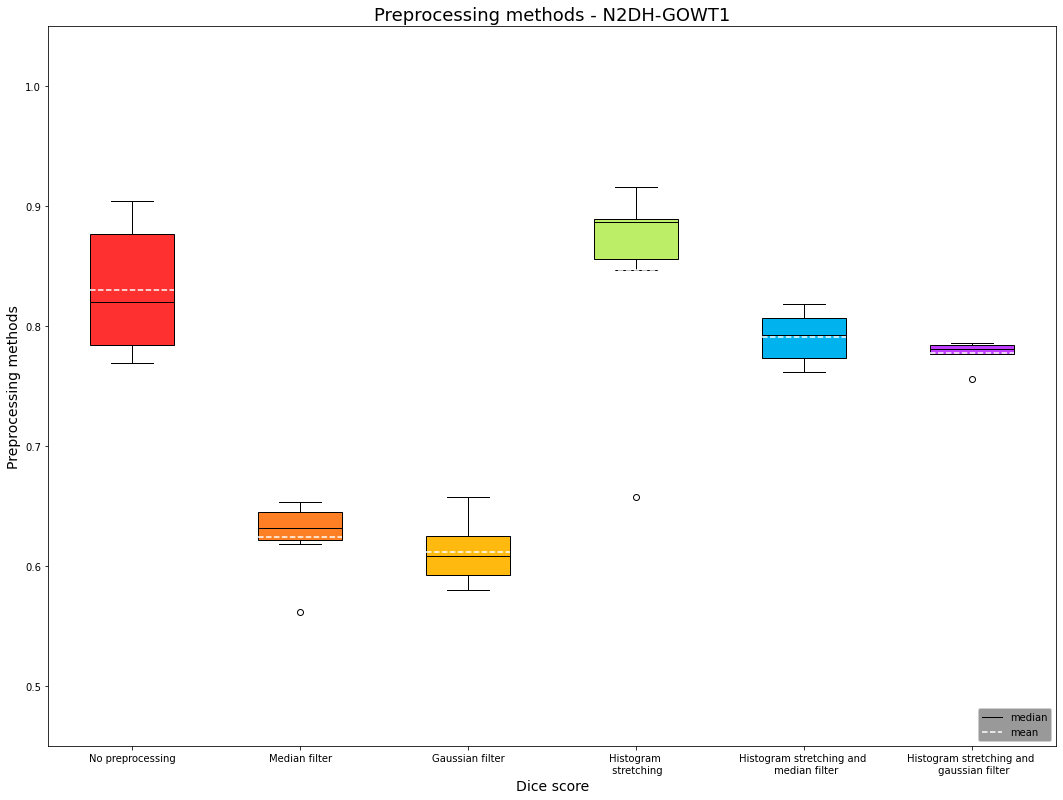

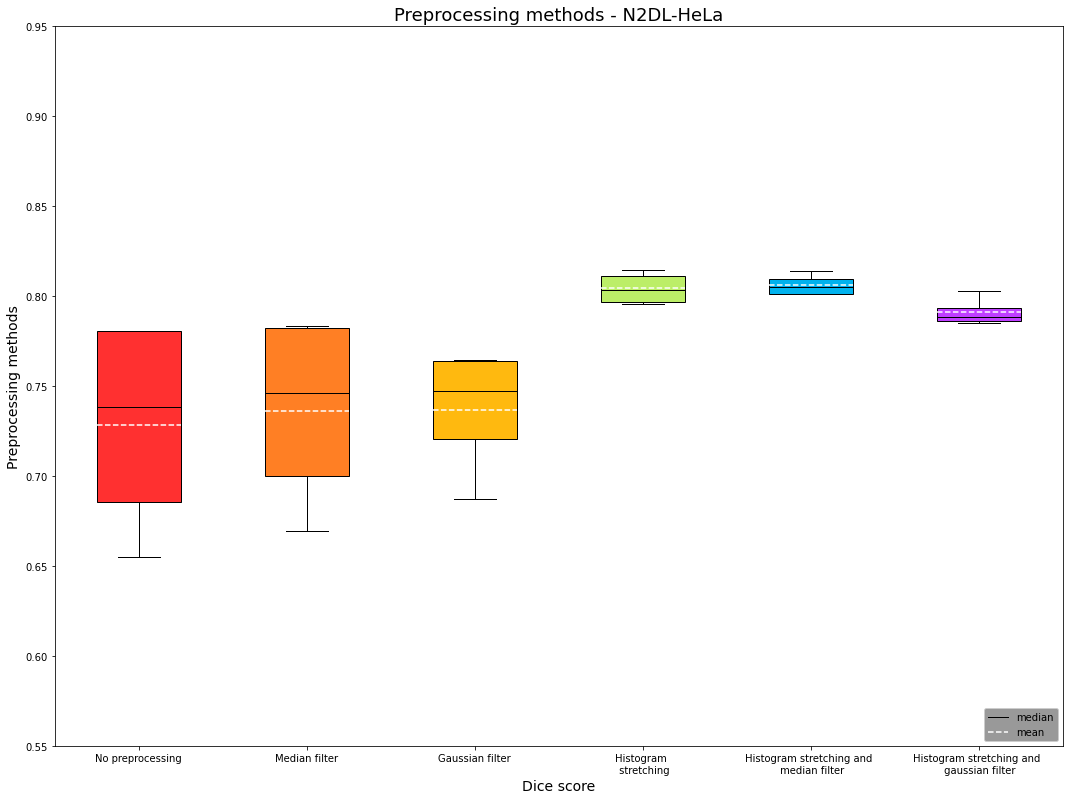

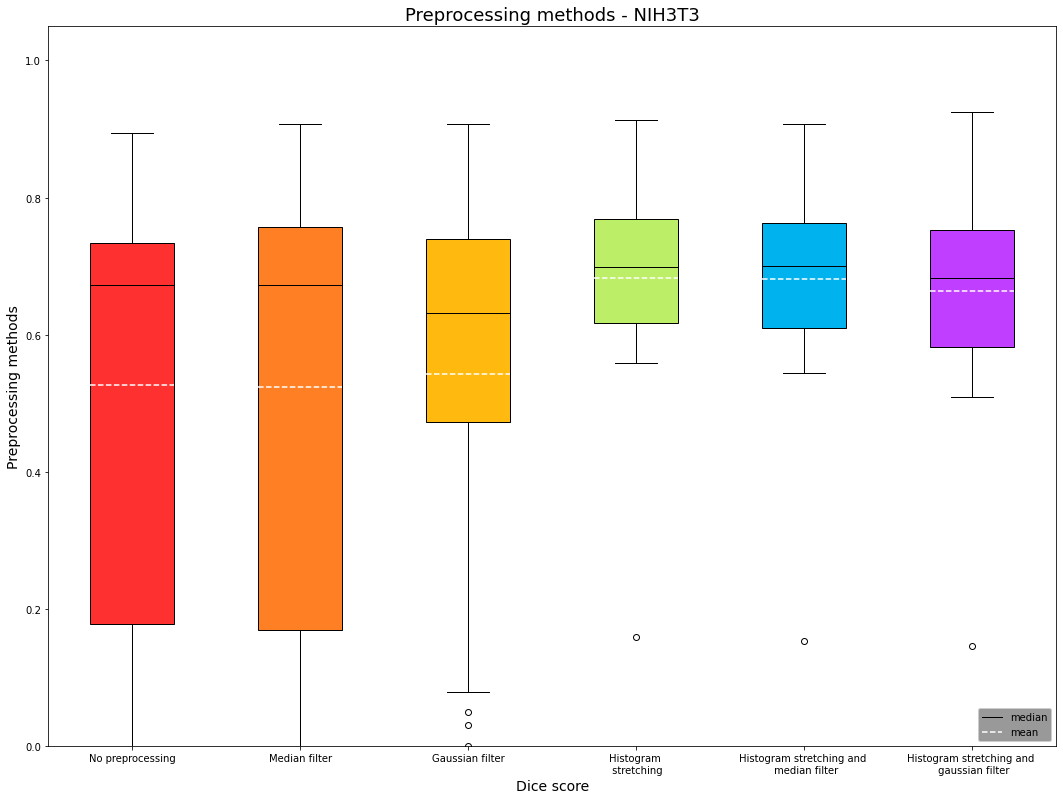

In [19]:
complete_analysis_global_otsu("N2DH-GOWT1")
complete_analysis_global_otsu("N2DL-HeLa")
complete_analysis_global_otsu("NIH3T3")

In [24]:
def complete_analysis_two_level_otsu(x):
    if x == 'N2DH-GOWT1':
        
        img_N2DH_GOWT1 = []
        path = r"data/Otsu_data/N2DH-GOWT1/img"
        for f in os.listdir(path):
            img_N2DH_GOWT1.append(imread(os.path.join(path , f)))

        gt_N2DH_GOWT1 = []
        path = r"data/Otsu_data/N2DH-GOWT1/gt"
        for f in os.listdir(path):
            gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

        binary_gt_N2DH_GOWT1 = []
        for i in range(0,len(gt_N2DH_GOWT1)):
            binary_gt_N2DH_GOWT1.append(pp.binarize(gt_N2DH_GOWT1[i])) 

        copy_img_N2DH_GOWT1 = img_N2DH_GOWT1.copy()

        median_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(copy_img_N2DH_GOWT1[i] , 9))

        gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1[i] , 9))

        stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            stretch_img_N2DH_GOWT1.append(pp.stretch(copy_img_N2DH_GOWT1[i]))

        median_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(median_img_N2DH_GOWT1)):
            median_stretch_img_N2DH_GOWT1.append(pp.stretch(median_img_N2DH_GOWT1[i]))

        stretch_median_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            stretch_median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1[i] , 9))

        gauss_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_img_N2DH_GOWT1)):
            gauss_stretch_img_N2DH_GOWT1.append(pp.stretch(gauss_img_N2DH_GOWT1[i]))
        
        stretch_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            stretch_gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1[i] , 9))
        print('pre finished')
        otsu_img_N2DH_GOWT1 = []
        for i in range(0,len(copy_img_N2DH_GOWT1)):
            otsu_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(copy_img_N2DH_GOWT1[i] , 256),15))

        otsu_median_img_N2DH_GOWT1 = []
        for i in range(0,len(median_img_N2DH_GOWT1)):
            otsu_median_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(median_img_N2DH_GOWT1[i] , 256),15))

        otsu_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_img_N2DH_GOWT1)):
            otsu_gauss_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(gauss_img_N2DH_GOWT1[i] , 256),15))

        otsu_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_img_N2DH_GOWT1)):
            otsu_stretch_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(stretch_img_N2DH_GOWT1[i] , 256),15))
        print('hald otsu finished')
        otsu_median_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(median_stretch_img_N2DH_GOWT1)):
            otsu_median_stretch_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(median_stretch_img_N2DH_GOWT1[i] , 256),15))
            
        otsu_stretch_median_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_median_img_N2DH_GOWT1)):
            otsu_stretch_median_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(stretch_median_img_N2DH_GOWT1[i] , 256),15))

        otsu_gauss_stretch_img_N2DH_GOWT1 = []
        for i in range(0,len(gauss_stretch_img_N2DH_GOWT1)):
            otsu_gauss_stretch_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(gauss_stretch_img_N2DH_GOWT1[i] , 256),15))
        
        otsu_stretch_gauss_img_N2DH_GOWT1 = []
        for i in range(0,len(stretch_gauss_img_N2DH_GOWT1)):
            otsu_stretch_gauss_img_N2DH_GOWT1.append(pp.holefilling(tlo.two_level_otsu_thresholding(stretch_gauss_img_N2DH_GOWT1[i] , 256),15))
        print('otsu finished')
        dice_otsu_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_img_N2DH_GOWT1)):
            dice_otsu_img_N2DH_GOWT1.append(dsc.dice(otsu_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_median_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_median_img_N2DH_GOWT1)):
            dice_otsu_median_img_N2DH_GOWT1.append(dsc.dice(otsu_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_gauss_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_gauss_img_N2DH_GOWT1)):
            dice_otsu_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_img_N2DH_GOWT1)):
            dice_otsu_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        dice_otsu_median_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_median_stretch_img_N2DH_GOWT1)):
            dice_otsu_median_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_median_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_median_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_median_img_N2DH_GOWT1)):
            dice_otsu_stretch_median_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        #dice_both_stretch_median = [dice_otsu_median_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_median_img_N2DH_GOWT1]
        median1 = st.median(dice_otsu_median_stretch_img_N2DH_GOWT1)
        median2 = st.median(dice_otsu_stretch_median_img_N2DH_GOWT1)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_N2DH_GOWT1
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_N2DH_GOWT1
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(np.median(dice_both_stretch_median))]
        
        dice_otsu_gauss_stretch_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_gauss_stretch_img_N2DH_GOWT1)):
            dice_otsu_gauss_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))
        
        dice_otsu_stretch_gauss_img_N2DH_GOWT1 = []
        for j in range(0,len(otsu_stretch_gauss_img_N2DH_GOWT1)):
            dice_otsu_stretch_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

        median3 = st.median(dice_otsu_gauss_stretch_img_N2DH_GOWT1)
        median4 = st.median(dice_otsu_stretch_gauss_img_N2DH_GOWT1)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_N2DH_GOWT1
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_N2DH_GOWT1

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]

        data_N2DH_GOWT1 = [dice_otsu_img_N2DH_GOWT1 , dice_otsu_median_img_N2DH_GOWT1 , dice_otsu_gauss_img_N2DH_GOWT1 , dice_otsu_stretch_img_N2DH_GOWT1  , optimal_dice_stretch_median  , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_N2DH_GOWT1 , 'Preprocessing methods - N2DH-GOWT1-two-level-Otsu')
    
    
    if x == 'N2DL-HeLa' :     
        
        img_N2DL_HeLa = []
        path = r"data/Otsu_data/N2DL-HeLa/img"
        for f in os.listdir(path):
            img_N2DL_HeLa.append(imread(os.path.join(path , f)))

        gt_N2DL_HeLa = []
        path = r"data/Otsu_data/N2DL-HeLa/gt"
        for f in os.listdir(path):
            gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

        binary_gt_N2DL_HeLa = []
        for i in range(0,len(gt_N2DL_HeLa)):
            binary_gt_N2DL_HeLa.append(pp.binarize(gt_N2DL_HeLa[i])) 

        copy_img_N2DL_HeLa = img_N2DL_HeLa.copy()

        median_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(copy_img_N2DL_HeLa[i] , 2))

        gauss_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa[i] , 4))

        stretch_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            stretch_img_N2DL_HeLa.append(pp.stretch(copy_img_N2DL_HeLa[i]))

        median_stretch_img_N2DL_HeLa = []
        for i in range(0,len(median_img_N2DL_HeLa)):
            median_stretch_img_N2DL_HeLa.append(pp.stretch(median_img_N2DL_HeLa[i]))

        stretch_median_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            stretch_median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(stretch_img_N2DL_HeLa[i] , 2))
        
        gauss_stretch_img_N2DL_HeLa = []
        for i in range(0,len(gauss_img_N2DL_HeLa)):
            gauss_stretch_img_N2DL_HeLa.append(pp.stretch(gauss_img_N2DL_HeLa[i]))
        
        stretch_gauss_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            stretch_gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa[i] , 4))

        otsu_img_N2DL_HeLa = []
        for i in range(0,len(copy_img_N2DL_HeLa)):
            otsu_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(copy_img_N2DL_HeLa[i] , 256))

        otsu_median_img_N2DL_HeLa = []
        for i in range(0,len(median_img_N2DL_HeLa)):
            otsu_median_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(median_img_N2DL_HeLa[i] , 256))

        otsu_gauss_img_N2DL_HeLa = []
        for i in range(0,len(gauss_img_N2DL_HeLa)):
            otsu_gauss_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(gauss_img_N2DL_HeLa[i] , 256))

        otsu_stretch_img_N2DL_HeLa = []
        for i in range(0,len(stretch_img_N2DL_HeLa)):
            otsu_stretch_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(stretch_img_N2DL_HeLa[i] , 256))

        otsu_median_stretch_img_N2DL_HeLa = []
        for i in range(0,len(median_stretch_img_N2DL_HeLa)):
            otsu_median_stretch_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(median_stretch_img_N2DL_HeLa[i] , 256))
        
        otsu_stretch_median_img_N2DL_HeLa = []
        for i in range(0,len(stretch_median_img_N2DL_HeLa)):
            otsu_stretch_median_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(stretch_median_img_N2DL_HeLa[i] , 256))
        
        otsu_gauss_stretch_img_N2DL_HeLa = []
        for i in range(0,len(gauss_stretch_img_N2DL_HeLa)):
            otsu_gauss_stretch_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(gauss_stretch_img_N2DL_HeLa[i] , 256))
        
        otsu_stretch_gauss_img_N2DL_HeLa = []
        for i in range(0,len(stretch_gauss_img_N2DL_HeLa)):
            otsu_stretch_gauss_img_N2DL_HeLa.append(tlo.two_level_otsu_thresholding(stretch_gauss_img_N2DL_HeLa[i] , 256))

        dice_otsu_img_N2DL_HeLa = []
        for j in range(0,len(otsu_img_N2DL_HeLa)):
            dice_otsu_img_N2DL_HeLa.append(dsc.dice(otsu_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_median_img_N2DL_HeLa = []
        for j in range(0,len(otsu_median_img_N2DL_HeLa)):
            dice_otsu_median_img_N2DL_HeLa.append(dsc.dice(otsu_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_gauss_img_N2DL_HeLa = []
        for j in range(0,len(otsu_gauss_img_N2DL_HeLa)):
            dice_otsu_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_img_N2DL_HeLa)):
            dice_otsu_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_median_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_median_stretch_img_N2DL_HeLa)):
            dice_otsu_median_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_median_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        dice_otsu_stretch_median_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_median_img_N2DL_HeLa)):
            dice_otsu_stretch_median_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))
        
        median1 = st.median(dice_otsu_median_stretch_img_N2DL_HeLa)
        median2 = st.median(dice_otsu_stretch_median_img_N2DL_HeLa)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_N2DL_HeLa
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_N2DL_HeLa

        #dice_both_stretch_median = [dice_otsu_median_stretch_img_N2DL_HeLa , dice_otsu_stretch_median_img_N2DL_HeLa]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        dice_otsu_gauss_stretch_img_N2DL_HeLa = []
        for j in range(0,len(otsu_gauss_stretch_img_N2DL_HeLa)):
            dice_otsu_gauss_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))    
        
        dice_otsu_stretch_gauss_img_N2DL_HeLa = []
        for j in range(0,len(otsu_stretch_gauss_img_N2DL_HeLa)):
            dice_otsu_stretch_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_N2DL_HeLa , dice_otsu_stretch_gauss_img_N2DL_HeLa]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]

        median3 = st.median(dice_otsu_gauss_stretch_img_N2DL_HeLa)
        median4 = st.median(dice_otsu_stretch_gauss_img_N2DL_HeLa)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_N2DL_HeLa
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_N2DL_HeLa

        data_N2DLHeLa = [dice_otsu_img_N2DL_HeLa , dice_otsu_median_img_N2DL_HeLa , dice_otsu_gauss_img_N2DL_HeLa , dice_otsu_stretch_img_N2DL_HeLa , optimal_dice_stretch_median , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_N2DLHeLa , 'Preprocessing methods - N2DL-HeLa-two-level-Otsu')

    
    if x == 'NIH3T3' :
        
        img_NIH3T3 = []
        path = r"data/Otsu_data/NIH3T3/img"
        for f in os.listdir(path):
            img_NIH3T3.append(imread(os.path.join(path , f)))

        gt_NIH3T3 = []
        path = r"data/Otsu_data/NIH3T3/gt"
        for f in os.listdir(path):
            gt_NIH3T3.append(imread(os.path.join(path , f)))

        copy_img_NIH3T3 = img_NIH3T3.copy()

        median_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            median_img_NIH3T3.append(scipy.ndimage.median_filter(copy_img_NIH3T3[i] , 16))

        gauss_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(copy_img_NIH3T3[i] , 8))

        stretch_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            stretch_img_NIH3T3.append(pp.stretch(copy_img_NIH3T3[i]))

        median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            median_stretch_img_NIH3T3.append(pp.stretch(median_img_NIH3T3[i]))

        stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_median_img_NIH3T3.append(scipy.ndimage.median_filter(stretch_img_NIH3T3[i] , 16))

        gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            gauss_stretch_img_NIH3T3.append(pp.stretch(gauss_img_NIH3T3[i]))

        stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            stretch_gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(stretch_img_NIH3T3[i] , 8))

        otsu_img_NIH3T3 = []
        for i in range(0,len(copy_img_NIH3T3)):
            otsu_img_NIH3T3.append(tlo.two_level_otsu_thresholding(copy_img_NIH3T3[i] , 256))

        otsu_median_img_NIH3T3 = []
        for i in range(0,len(median_img_NIH3T3)):
            otsu_median_img_NIH3T3.append(tlo.two_level_otsu_thresholding(median_img_NIH3T3[i] , 256))

        otsu_gauss_img_NIH3T3 = []
        for i in range(0,len(gauss_img_NIH3T3)):
            otsu_gauss_img_NIH3T3.append(tlo.two_level_otsu_thresholding(gauss_img_NIH3T3[i] , 256))

        otsu_stretch_img_NIH3T3 = []
        for i in range(0,len(stretch_img_NIH3T3)):
            otsu_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding(stretch_img_NIH3T3[i] , 256))
        
        otsu_median_stretch_img_NIH3T3 = []
        for i in range(0,len(median_stretch_img_NIH3T3)):
            otsu_median_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding(median_stretch_img_NIH3T3[i] , 256))
        
        otsu_stretch_median_img_NIH3T3 = []
        for i in range(0,len(stretch_median_img_NIH3T3)):
            otsu_stretch_median_img_NIH3T3.append(tlo.two_level_otsu_thresholding(stretch_median_img_NIH3T3[i] , 256))
        
        otsu_gauss_stretch_img_NIH3T3 = []
        for i in range(0,len(gauss_stretch_img_NIH3T3)):
            otsu_gauss_stretch_img_NIH3T3.append(tlo.two_level_otsu_thresholding(gauss_stretch_img_NIH3T3[i] , 256))

        otsu_stretch_gauss_img_NIH3T3 = []
        for i in range(0,len(stretch_gauss_img_NIH3T3)):
            otsu_stretch_gauss_img_NIH3T3.append(tlo.two_level_otsu_thresholding(stretch_gauss_img_NIH3T3[i] , 256))

        dice_otsu_img_NIH3T3 = []
        for j in range(0,len(otsu_img_NIH3T3)):
            dice_otsu_img_NIH3T3.append(dsc.dice(otsu_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_median_img_NIH3T3 = []
        for j in range(0,len(otsu_median_img_NIH3T3)):
            dice_otsu_median_img_NIH3T3.append(dsc.dice(otsu_median_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_img_NIH3T3)):
            dice_otsu_gauss_img_NIH3T3.append(dsc.dice(otsu_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_img_NIH3T3)):
            dice_otsu_stretch_img_NIH3T3.append(dsc.dice(otsu_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_median_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_median_stretch_img_NIH3T3)):
            dice_otsu_median_stretch_img_NIH3T3.append(dsc.dice(otsu_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

        dice_otsu_stretch_median_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_median_img_NIH3T3)):
            dice_otsu_stretch_median_img_NIH3T3.append(dsc.dice(otsu_stretch_median_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        #dice_both_stretch_median = [dice_otsu_median_stretch_img_NIH3T3 , dice_otsu_stretch_median_img_NIH3T3]
        #optimal_dice_stretch_median = dice_both_stretch_median[dice_both_stretch_median == max(st.median(dice_both_stretch_median))]
        
        
        median1 = st.median(dice_otsu_median_stretch_img_NIH3T3)
        median2 = st.median(dice_otsu_stretch_median_img_NIH3T3)

        if(max(median1,median2) == median1):
            optimal_dice_stretch_median = dice_otsu_median_stretch_img_NIH3T3
        else: optimal_dice_stretch_median = dice_otsu_stretch_median_img_NIH3T3

        dice_otsu_gauss_stretch_img_NIH3T3 = []
        for j in range(0,len(otsu_gauss_stretch_img_NIH3T3)):
            dice_otsu_gauss_stretch_img_NIH3T3.append(dsc.dice(otsu_gauss_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))
        
        dice_otsu_stretch_gauss_img_NIH3T3 = []
        for j in range(0,len(otsu_stretch_gauss_img_NIH3T3)):
            dice_otsu_stretch_gauss_img_NIH3T3.append(dsc.dice(otsu_stretch_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

        #dice_both_stretch_gauss = [dice_otsu_gauss_stretch_img_NIH3T3, dice_otsu_stretch_gauss_img_NIH3T3]
        #optimal_dice_stretch_gauss = dice_both_stretch_gauss[dice_both_stretch_gauss == max(st.median(dice_both_stretch_gauss))]
        
        median3 = st.median(dice_otsu_gauss_stretch_img_NIH3T3)
        median4 = st.median(dice_otsu_stretch_gauss_img_NIH3T3)

        if(max(median3,median4) == median3):
            optimal_dice_stretch_gauss = dice_otsu_gauss_stretch_img_NIH3T3
        else: optimal_dice_stretch_gauss = dice_otsu_stretch_gauss_img_NIH3T3

        data_NIH3T3 = [dice_otsu_img_NIH3T3 , dice_otsu_median_img_NIH3T3 , dice_otsu_gauss_img_NIH3T3 , dice_otsu_stretch_img_NIH3T3 , optimal_dice_stretch_median , optimal_dice_stretch_gauss]

        boxplot = pp.dataset_boxplot_otsu(data_NIH3T3 , 'Preprocessing methods - NIH3T3-two-level-Otsu')
        
    return boxplot

pre finished
hald otsu finished
otsu finished


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


c:\Users\marie\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


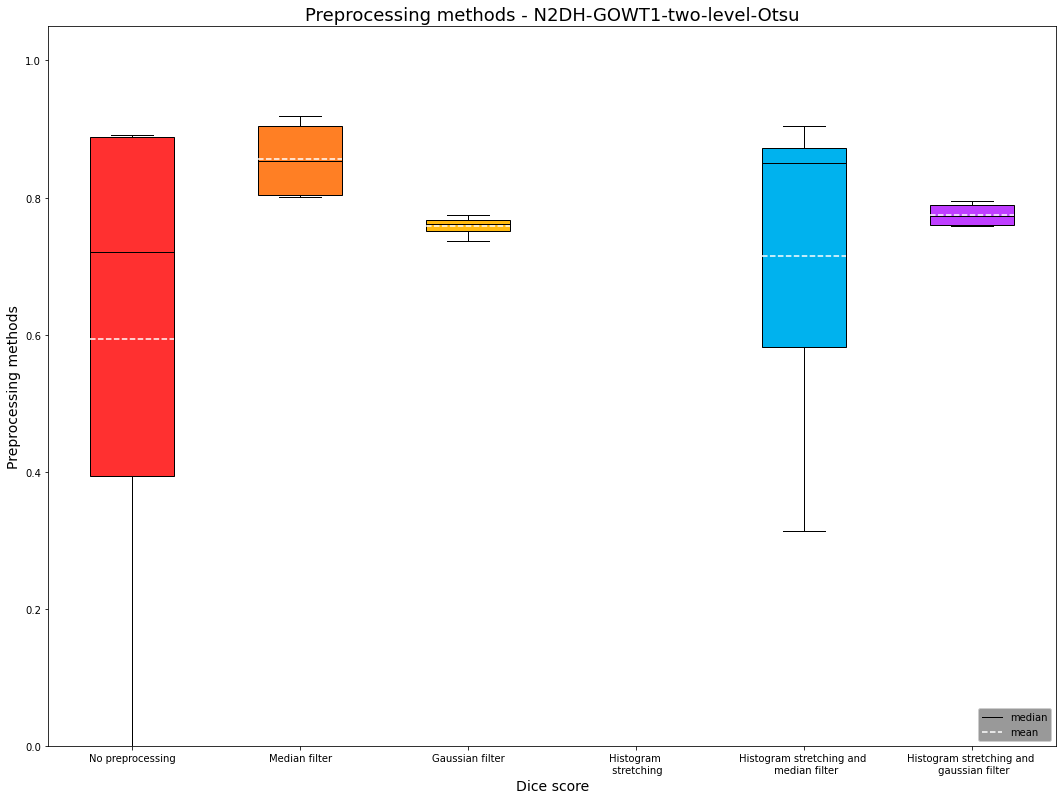

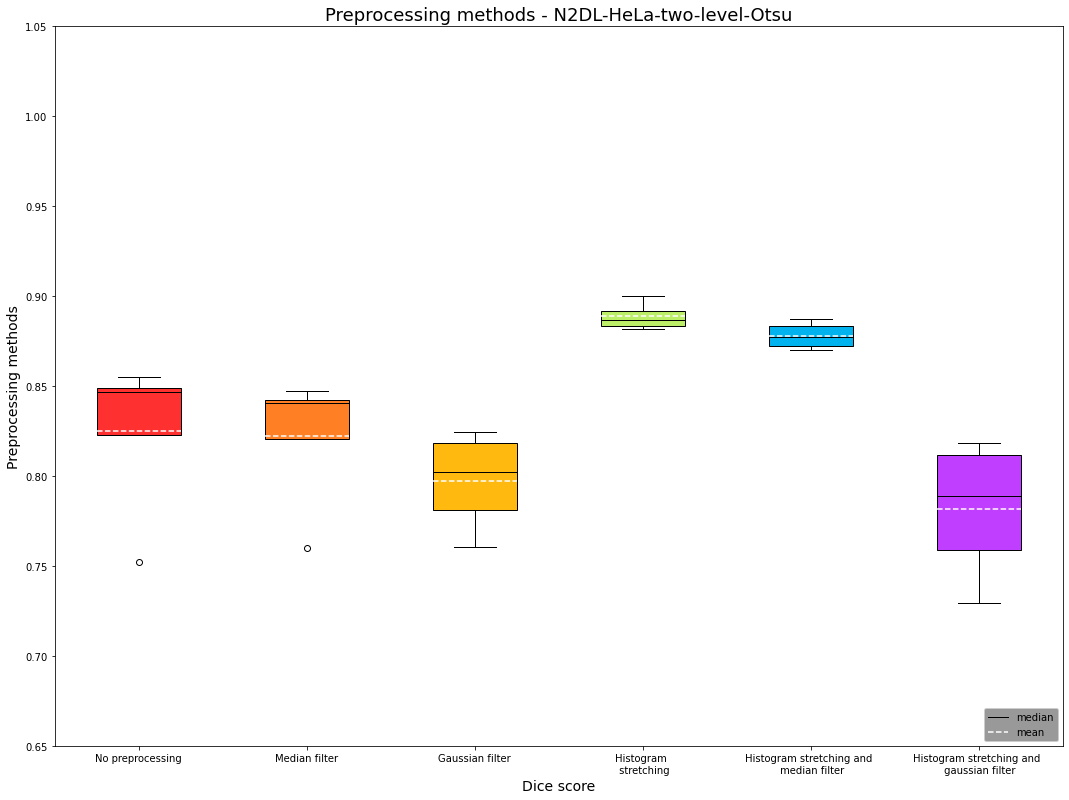

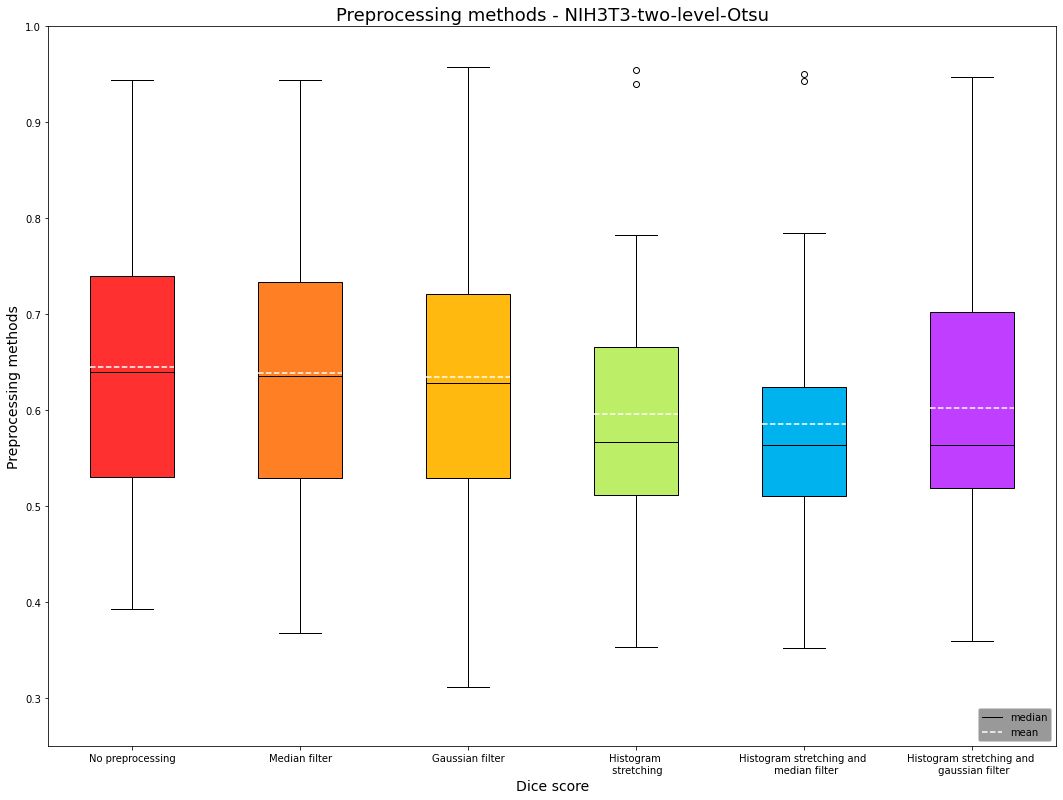

In [25]:
complete_analysis_two_level_otsu("N2DH-GOWT1")
complete_analysis_two_level_otsu("N2DL-HeLa")
complete_analysis_two_level_otsu("NIH3T3")

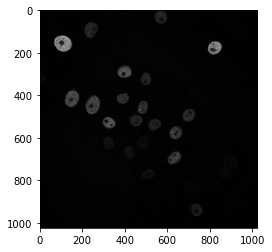

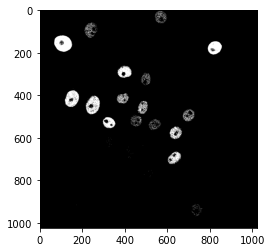

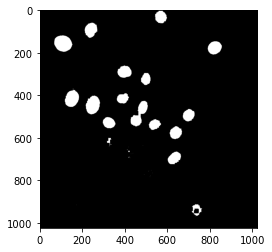

In [7]:

from nuclei_segmentation import preprocessing
from nuclei_segmentation import otsu
img = imread(r"data/Otsu_data/N2DH-GOWT1/img/t31.tif")
figure()
imshow(img, 'gray')
otsu_img = otsu.otsu_thresholding(img, 256)

figure()
imshow(otsu_img, 'gray')
noholes = preprocessing.holefilling(otsu_img, 15)
figure()
imshow(noholes, 'gray')

Hole filling für N2DH-GOWT1 muss noch rein


für clip und local brauchen wir noch die beste Y achsen ticks und ob stretch zuerst oder danach
hallo
hi